# Dataset: History of HearthStone

<br>
Hearthstone is a global competitive online card game by Activision Blizzard with a streamlined card-base, massive user-base, and a constantly evolving meta-game based around clever combinations and some small bit of luck. The dataset I chose to analyze is Kaggle’s “History of Hearthstone” dataset, an 80 MB file of 346,242 user-submitted deck builds submitted over 3 years.
<br>

Though the choice may be a little odd, this HearthStone data can show a lot of interesting trends and human behaviors. TheoryCraft decks, an unfortunately small subset of the data, were made to possibly try and anticipate the meta-game before a new set release. Asides from the card ID’s, the set includes deck archetype (based on class and card composition), as well as restricted and unrestricted card formats,  (Normal/Wild), a ratings’ system based on a deck’s popularity, and the date the deck was submitted. Time Series analysis, prediction algorithms, association rules, and classification algorithms could yield insights into how people consider this game’s strategy worldwide, and how Blizzard reacts to its players.
<br>

At the individual card level we have the data contained in the dataset’s json file, detailing the traits and text of each card. Perceived card values rise and fall in popularity due to an overarching meta-game, as some cards are improved or handicapped, or even taken out of the game entirely. Algorithms could be made to predict new card strengths based on a Set’s overall card composition and popularity, recommender systems can be made to predict a hypothetical deck’s popularity and strength, and Networks could be used to figure out the next over-used card to be removed from the game, or a shift in the meta-game as an unpopular class becomes better with a new release or handicap.
<br>

# Data Exploration and Visualization

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Import data
decks = pd.read_csv('data.csv')
cards = pd.read_json('refs.json')

import warnings
warnings.filterwarnings("ignore")


In [3]:
# Let's only use Ranked Decks. The other decks have weird compositions (Tavern Brawl), 
# or are too small to make a difference (TheoryCrafting)
decks = pd.DataFrame(decks)
decks['deck_type'] = decks['deck_type'].astype('str') 
Ranked = pd.DataFrame(decks.loc[decks["deck_type"] == "Ranked Deck"])


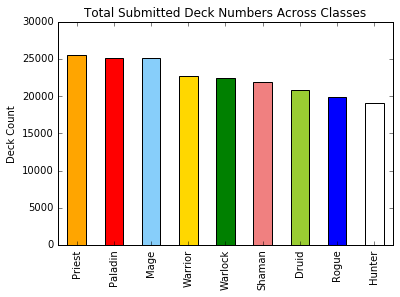

In [4]:
# We see that overall, the variance of submitted decks for each class is rather small.
Ranked['deck_class'].value_counts().plot.bar(color = ["orange", 'red', 'lightskyblue', "gold","green", "lightcoral", "yellowgreen",'blue',  "white"])
plt.title("Total Submitted Deck Numbers Across Classes")
plt.ylabel("Deck Count")

<br>
Now we want to see if there is a lot of variance over the years. Overall stability could be masking large swings in balance between classes between years.
<br>

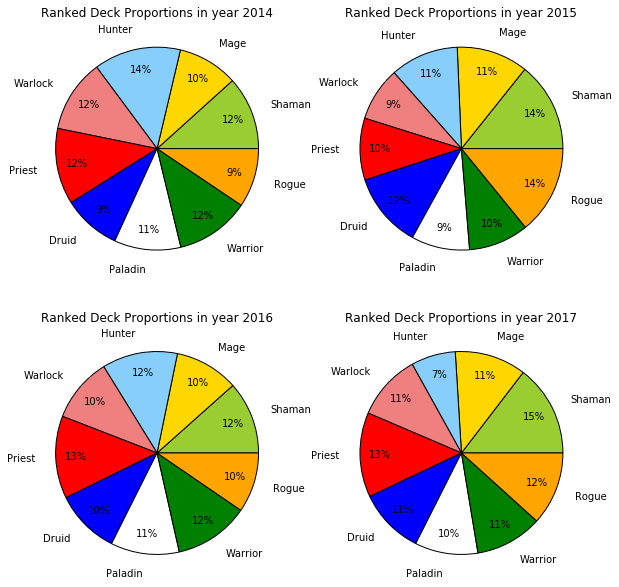

In [6]:
# Make a subplot
plt.figure(figsize=(10,10))
j = 1
Ranked['year'] = Ranked['date'].astype(str).str[0:4]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', "red", "blue", "white", "green", "orange"]
for i in ["2014","2015","2016","2017"]:
    plt.subplot(220 + j)
    #print("Ranked Deck Proportions in year ", i)
    plt.title("Ranked Deck Proportions in year "+ i)
    plt.pie(Ranked['deck_class'][Ranked['year'] == i].value_counts(sort=False),
            labels=list(Ranked['deck_class'][Ranked['year'] == '2017'].value_counts(sort=False).index), 
            colors = colors,
            autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.2)
    j+=1
plt.show()

Note that the overall submitted deck proportions don't fluctuate much, except for Hunter.
That said, this doesn't mean that Hunter is less popular. During 2014 and 2017, the Hunter class could have fewer deck archtypes, but those archtypes could have been more successful. A more in-depth dive into the data would want to look at these numbers with a rating factor to emphasize effective builds.
<br>

In [5]:
sets = list(Ranked['deck_set'].value_counts(sort=False).index)

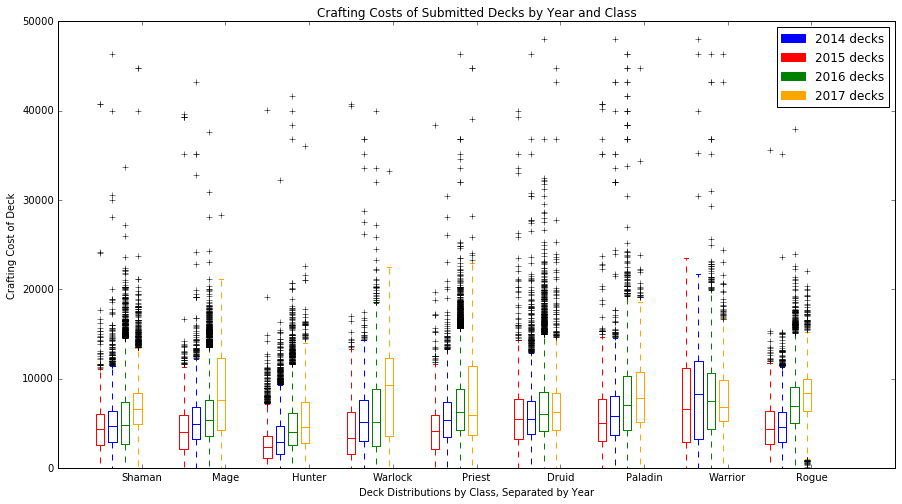

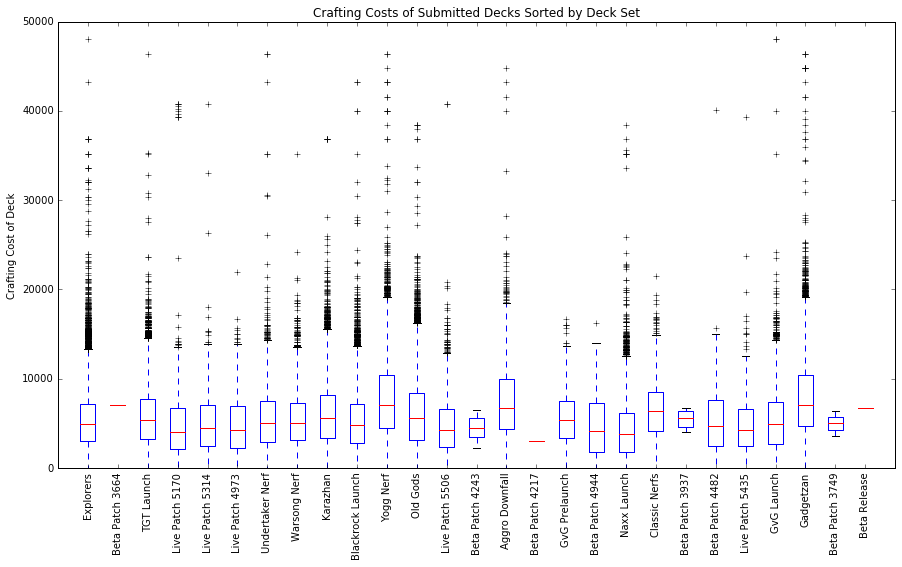

In [8]:
# Now, let's look at the distributions of crafting costs of decks per class over time.
# Do it as a boxplot
import matplotlib.patches as mpatches
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes

# Use this to find decks with any hint of popularity
Ranked2 = Ranked[Ranked["rating"] >= 5]
Ranked2['deck_class'].apply(str) 
Ranked['year'].apply(str) 
Ranked['deck_class'].apply(str) 
Ranked['year'].apply(str)   

# function for setting the colors of the box plots pairs
color = ['red', 'blue',"green", "orange"]
def setBoxColors(bp):
    plt.setp(bp['boxes'][0], color=color[0])
    plt.setp(bp['boxes'][1], color=color[1])
    plt.setp(bp['boxes'][2], color=color[2])
    plt.setp(bp['boxes'][3], color=color[3])
    
    plt.setp(bp['whiskers'][0], color=color[0])
    plt.setp(bp['whiskers'][1], color=color[0])
    plt.setp(bp['whiskers'][2], color=color[1])
    plt.setp(bp['whiskers'][3], color=color[1]) 
    plt.setp(bp['whiskers'][4], color=color[2])
    plt.setp(bp['whiskers'][5], color=color[2])
    plt.setp(bp['whiskers'][6], color=color[3])
    plt.setp(bp['whiskers'][7], color=color[3])
    
    plt.setp(bp['caps'][0], color=color[0])
    plt.setp(bp['caps'][1], color=color[0])
    plt.setp(bp['caps'][2], color=color[1])
    plt.setp(bp['caps'][3], color=color[1]) 
    plt.setp(bp['caps'][4], color=color[2])
    plt.setp(bp['caps'][5], color=color[2])
    plt.setp(bp['caps'][6], color=color[3])
    plt.setp(bp['caps'][7], color=color[3])

    plt.setp(bp['medians'][0], color=color[0])
    plt.setp(bp['medians'][1], color=color[1])
    plt.setp(bp['medians'][2], color=color[2])
    plt.setp(bp['medians'][3], color=color[3])

fig = figure(figsize=(15,8))
# Data:

classes = list(Ranked['deck_class'][Ranked['year'] == '2017'].value_counts(sort=False).index)

j = 1
for i in classes:
    # for X for each value, I need to get the series of 
    X = [[],[],[],[]]
    for k in range(4):
        year = 2014+k
        X[k] = Ranked["craft_cost"][(Ranked['year'] == str(year)) & (Ranked["deck_class"].astype(str)== i)]#.value_counts(sort=False)
    bp = boxplot(X, positions = [j, j+0.3, j+.6, j+0.9], widths = 0.2)
    setBoxColors(bp)
    j +=2

ax = axes()
hold(True)

# set axes limits and labels
xlim(0,20)
#ylim(0,10)
ax.set_xticklabels(classes)
ax.set_xticks([2,4,6,8,10,12,14,16,18])

# draw temporary  lines for the legend
blue_patch = mpatches.Patch(color='blue', label='2014 decks')
red_patch = mpatches.Patch(color='red', label='2015 decks')
green_patch = mpatches.Patch(color='green', label='2016 decks')
orange_patch = mpatches.Patch(color='orange', label='2017 decks')

plt.legend(handles=[blue_patch,red_patch, green_patch, orange_patch])
plt.ylabel("Crafting Cost of Deck")
plt.xlabel("Deck Distributions by Class, Separated by Year")
plt.title("Crafting Costs of Submitted Decks by Year and Class")
#hB.set_visible(False)
#hR.set_visible(False)


# Now let's see what the deck costs are like for decks with some amount of ratings?
# Now let's make a similar plot for the classes to sets
fig2 = figure(figsize=(15,8))
sets = list(Ranked['deck_set'].value_counts(sort=False).index)
j = 0
for i in sets:
    # for X for each value, I need to get the series of 
    X = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    X[j] = Ranked["craft_cost"][Ranked['deck_set'] == str(i)]#.value_counts(sort=False)
    bp = boxplot(X, widths = 0.5)
    j +=1

ax = axes()
hold(True)

# set axes limits and labels
xlim(0,20)
ax.set_xticklabels(sets, rotation = 90)
ax.set_xticks(list(range(1,29)))
plt.ylabel("Crafting Cost of Deck")
plt.title("Crafting Costs of Submitted Decks Sorted by Deck Set")
#hB.set_visible(False)
#hR.set_visible(False)
show()

The deck costs show a general uptrend in cost in ranked submitted decks, which isn't surprising. However, the median deck is still well within the affordable 5000-10000 cost-range.
<br>

In [9]:
# Get the card names here:
CARD_DATA = cards[['dbfId',"name","rarity","playerClass"]]
# get the name of each card:
# example:
CARD_DATA[CARD_DATA["dbfId"] == 192]["name"].value_counts(sort=False).index[0]

'Ice Block'

Here, we're going to look at the interrelatedness of cards within Decks. Some card combinations are popular in decks and have obvious synergies. Let's see if we can find differences in the most popular synergies for each class. (Decks with at least 5 votes). The blue edges on the graph will be 2x+ the 1% threshold count of the top card pairs.
<br>

Networks of top 1% of cards divided by class from Set Gadgetzan


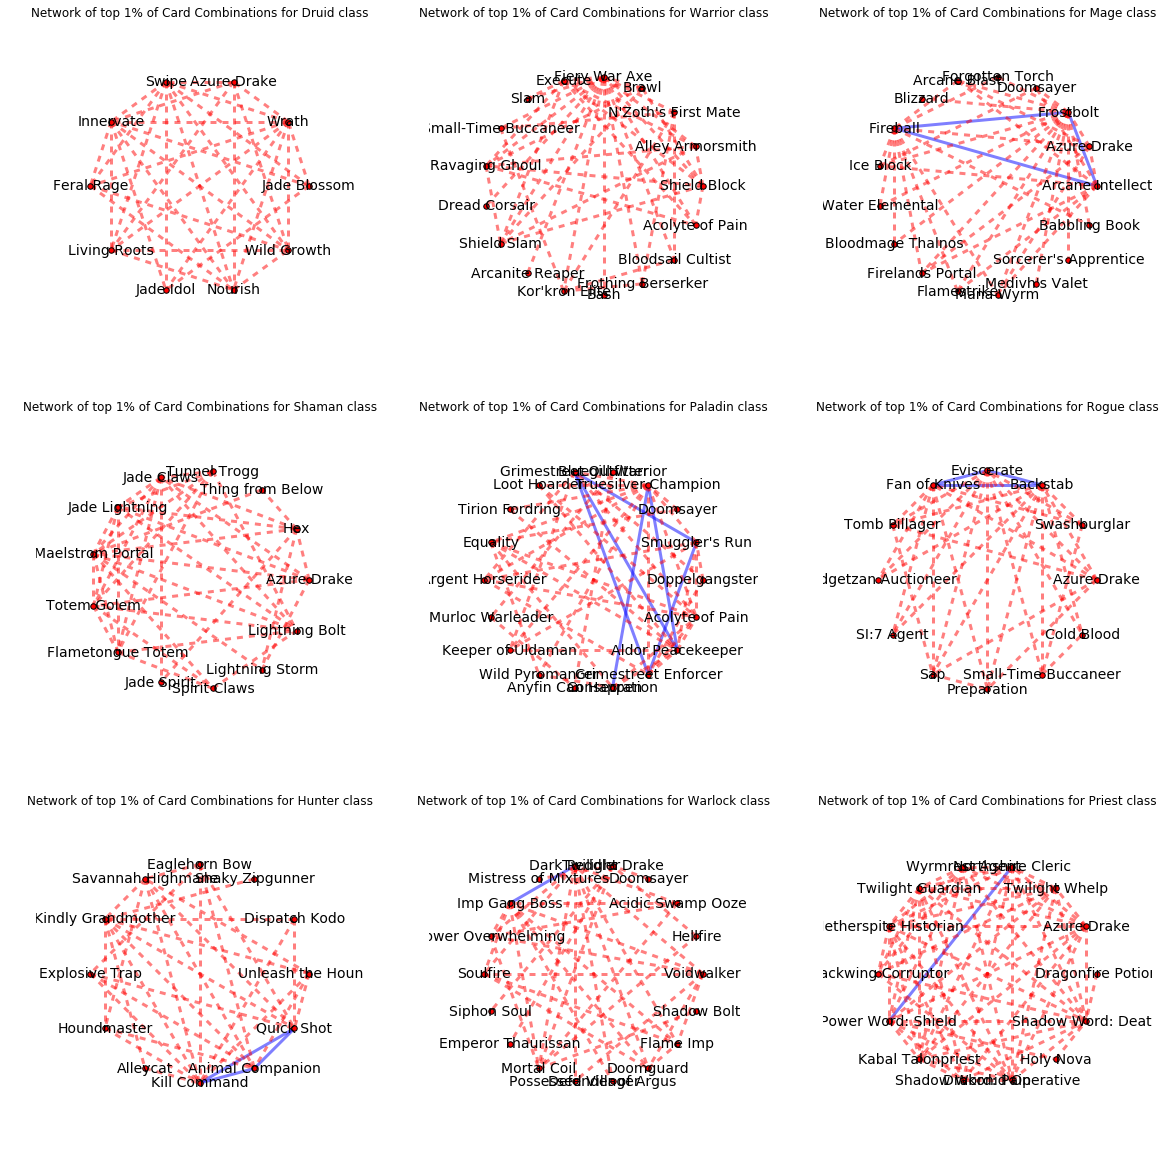

Networks of top 1% of cards divided by class from Set Blackrock Launch


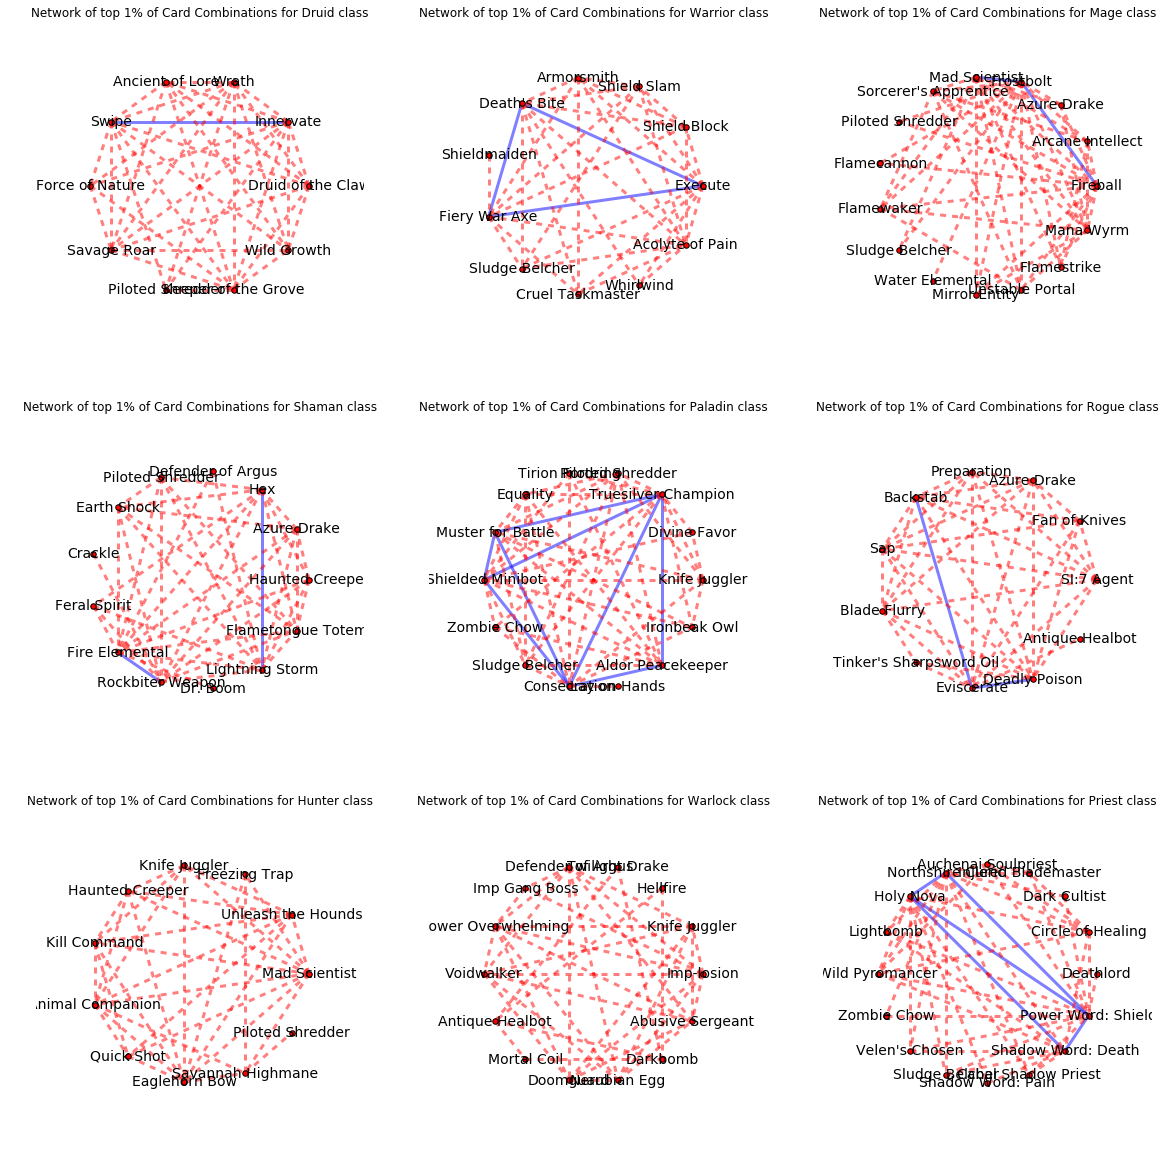

In [787]:
# Make a Network of popular Used Card Combinations 
# How often are cards used together in decks?
from collections import defaultdict
import operator, math

def counting_cards(list_of_full_deck,deck_card_combos,total_card_counts):
    for m in range(len(list_of_full_deck)):
        G = list(sorted(list_of_full_deck[m]))
        for i in G:
            if str(i) not in total_card_counts:
                total_card_counts[str(i)] = 1
            else:
                total_card_counts[str(i)] += 1
            for j in G:
                if i !=j:
                    temp = (str(i), str(j))
                    if temp not in deck_card_combos:
                        deck_card_combos[temp] = 1
                    else:
                        deck_card_combos[temp] += 1
    return deck_card_combos, total_card_counts

def Deck_class_structing(current_set,i):
    Current_Deck = pd.DataFrame(current_set[current_set["deck_class"] == str(i)])
    list_of_full_deck = []
    deck_card_combos = defaultdict(int) # this is for the pairs
    total_card_counts = defaultdict(int)
    for j in range(len(Current_Deck)):
        this_deck = []
        for k in range(30):
            card = "card_" + str(k)
            this_deck.append(Current_Deck[card].iloc[j])
        list_of_full_deck.append(this_deck)
    return list_of_full_deck, deck_card_combos, total_card_counts

def graph_network(class_default_dict_counts,i):
    G=nx.Graph()
    min_node_count = math.floor(len(class_default_dict_counts)/100) # 1% of the interactions.
    # find the top X number of exchanges:
    tuple_list = sorted(class_default_dict_counts.items(), key=operator.itemgetter(1),reverse=True)[:min_node_count]
    top_nodes = dict(tuple_list)
    for key in top_nodes: # class_default_dict_counts: # or we just use the original
        #if class_default_dict_counts[key] > min_node_count:
        G.add_edge(CARD_DATA[CARD_DATA["dbfId"] == float(key[0])]["name"].value_counts(sort=False).index[0],
                   CARD_DATA[CARD_DATA["dbfId"] == float(key[1])]["name"].value_counts(sort=False).index[0], 
                   weight = np.log(class_default_dict_counts[key])) 
    elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >np.log(tuple_list[-1][1]*2)]
    esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=np.log(tuple_list[-1][1]*2)]
    pos=nx.circular_layout(G) # positions for all nodes
    # nodes
    nx.draw_networkx_nodes(G,pos,node_size=30)
    # edges
    # Maybe, make the edges fray as they get less strong?
    nx.draw_networkx_edges(G,pos,edgelist=elarge,width=3,alpha=0.5,edge_color='blue' )
    nx.draw_networkx_edges(G,pos,edgelist=esmall,width=3,alpha=0.5,edge_color='red',style='dashed')
    # labels
    nx.draw_networkx_labels(G,pos,font_size=14,font_color = "black", font_family='sans-serif')
    plt.axis('off')
    plt.title("Network of top 1% of Card Combinations for "+i + " class")

# Make 2 plots of 9 subplots
def Make_networks_for_each_class(Set):
    fig = figure(figsize = (20,20))
    x = 1
    print("Networks of top 1% of cards divided by class from Set "+ Set)
    Set = Make_Set_from_string(Set)
    class_default_dict_counts = [] # this is for the pairs
    total_cards_by_class = []
    for i in classes:
        plt.subplot(330+x)
        plt.title("Most used card combinations in set")
        x+=1
        temp_stuff = Deck_class_structing(Set,i)
        A = counting_cards(temp_stuff[0],temp_stuff[1],temp_stuff[2])
        class_default_dict_counts.append(A[0])
        total_cards_by_class.append(A[1])
        graph_network(A[0],i)
    plt.show()


def Make_Set_from_string(text):
    Set = pd.DataFrame(Ranked[(Ranked["rating"]>5) & (Ranked['deck_set'] == str(text))])
    return Set
# Maybe make it as a text-input box?
Make_networks_for_each_class("Gadgetzan")
Make_networks_for_each_class("Blackrock Launch")

We can see from the network charts some trends. Note that the consistently-used Azure Drake was eventually removed from play after Gadgetzan, and the later-depowered Knife Juggler was used in several classes of decks extensively. What's surprising, though, is that many of the top cards are cheap and common. Knife Juggler, Piloted Shredder, Swamp Ooze, and most cheap class-specific cards are highly used between the two sets. 
<br>

# Classification Algorithms

In [10]:
years = list(Ranked['year'].value_counts(sort=False).index)
years
# We see that we have very uneven weights for our deck submissions
print(Ranked['year'].value_counts())
tuple_list = [("A", 5), ("B", 3)]
tuple_list[-1][1]

2016    97657
2015    61426
2014    25971
2017    17310
2013       11
Name: year, dtype: int64


3

I elected to remove the 2013 submitted decks because the sample size is 1000x smaller than the next largest set. The 2017 decks are smaller because the data was scraped at the beginning of 2017. An updated dataset will probably have more 2017 decks.
<br>
Now, we want to see if we can use a Machine Learning Algorithm to predict which year a deck was submitted. The fact that a large number of decks use some of the Basic Cards, and Sets often have a rolling window of 1-2 years before their rendered obsolete should make this an interesting effort.
<br>
First, we try a complete random Baseline, and maybe a Naive Bayes classifier as well.

In [11]:
# Use an ML Algorithm to find out something cool
Ranked_MLA = Ranked

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

def NB_Classify(Ranked, log = True):
    card_complete = ['card_{}'.format(str(i)) for i in range(30)]
    X = Ranked[card_complete][Ranked['year']!= "2013"].applymap(str)
    Y = Ranked['year'][Ranked['year']!= "2013"]
    # train / test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
    # Naive Bayes Classifier
    clf = MultinomialNB(alpha=0.1)
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    
    # Random classification 
    clf2 = DummyClassifier()
    clf2.fit(X_train, Y_train)
    pred2 = clf2.predict(X_test)
    
    # NB metrics
    Dummy_conf_matrix = pd.DataFrame(
        confusion_matrix(Y_test, pred2), 
        columns=clf.classes_, 
        index=clf.classes_
    )
    
    conf_matrix = pd.DataFrame(
        confusion_matrix(Y_test, pred), 
        columns=clf.classes_, 
        index=clf.classes_
    )
    
    if log:
        print("Random Predictions")
        print (classification_report(Y_test, pred2))
        print (cohen_kappa_score(Y_test, pred2))
        print (f1_score(Y_test, pred2, average = "weighted"))
        print (Dummy_conf_matrix)
        print("\n")
        
        print("Naive Bayes Predictions")
        print (classification_report(Y_test, pred))
        print (cohen_kappa_score(Y_test, pred))
        print (f1_score(Y_test, pred, average = "weighted"))
        print (conf_matrix)
    return clf

NB_Classify(Ranked, log = True)

Random Predictions
             precision    recall  f1-score   support

       2014       0.13      0.13      0.13      5142
       2015       0.31      0.31      0.31     12193
       2016       0.49      0.48      0.49     19672
       2017       0.09      0.10      0.09      3466

avg / total       0.36      0.35      0.35     40473

0.00768518652238015
0.35418082683167845
      2014  2015  2016  2017
2014   666  1501  2494   481
2015  1587  3800  5704  1102
2016  2497  5998  9488  1689
2017   440  1068  1628   330


Naive Bayes Predictions
             precision    recall  f1-score   support

       2014       0.16      0.15      0.15      5142
       2015       0.52      0.79      0.63     12193
       2016       0.83      0.40      0.54     19672
       2017       0.22      0.48      0.30      3466

avg / total       0.60      0.49      0.50     40473

0.29431911011697864
0.4984233397435284
      2014  2015  2016  2017
2014   754  4368     8    12
2015  2210  9693   183   107
20

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

We see that we can improve the precision and accuracy by a good amount (15%), as well as Cohen's Kappa score (~30%), from the baseline. Even though we're not making direct vectors of the card counts themselves, this gives us some useable info. People might be ordering their submitted decks in predictable ways that the algorithm picks up.
But we could probably do better. Assuming every card in a deck is independent of the others flies in the face of the Network graphs, so we'll try something else and treat the Multinomial Naive Bayes as a second baseline.
<br>

# Multiclass Logistic Regression:
<br>
Although Logistic Regression was originally built for binary classification, it's possible to use this model for multiclass scenarios. We'll specify that our Logistic Regression algorithm by the One-Versus-Rest method, which classifies for each class on a separate model, determining whether the model is for that year in our case, or not. Each classifier will assume that it's independent from the others, which might get us into trouble due to the value overlaps. Because we're treating the decks as text data, (bags of 'words' with 1-2 counts in each), we'll use the L1 penalty for the classifier, giving us less of a penalty for outliers.
<br>

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
def LR_Classify(Ranked, log = True):
    card_complete = ['card_{}'.format(str(i)) for i in range(30)]
    X = Ranked[card_complete][Ranked['year']!= "2013"].applymap(str)
    Y = Ranked['year'][Ranked['year']!= "2013"]
    # train / test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
    # 1-vs.-all Logistic Regression Classifier
    clf = LogisticRegression(penalty = "l1", multi_class="ovr")
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    
    # Random classification 
    clf2 = DummyClassifier()
    clf2.fit(X_train, Y_train)
    pred2 = clf2.predict(X_test)
    
    # NB metrics
    Dummy_conf_matrix = pd.DataFrame(
        confusion_matrix(Y_test, pred2), 
        columns=clf.classes_, 
        index=clf.classes_
    )
    
    conf_matrix = pd.DataFrame(
        confusion_matrix(Y_test, pred), 
        columns=clf.classes_, 
        index=clf.classes_
    )
    
    if log:
        print("Random Predictions")
        print (classification_report(Y_test, pred2))
        print (cohen_kappa_score(Y_test, pred2))
        print (f1_score(Y_test, pred2, average = "weighted"))
        print (Dummy_conf_matrix)
        print("\n")
        
        print("Logistic Regression 1-v-all Predictions")
        print (classification_report(Y_test, pred))
        print (cohen_kappa_score(Y_test, pred))
        print (f1_score(Y_test, pred, average = "weighted"))
        print (conf_matrix)
    return clf

LR_Classify(Ranked, log = True)

Random Predictions
             precision    recall  f1-score   support

       2014       0.13      0.13      0.13      5152
       2015       0.30      0.30      0.30     12276
       2016       0.48      0.49      0.48     19521
       2017       0.08      0.08      0.08      3524

avg / total       0.35      0.35      0.35     40473

0.00020422436254807774
0.34860369943905833
      2014  2015  2016  2017
2014   688  1538  2502   424
2015  1626  3673  5917  1060
2016  2550  5822  9474  1675
2017   461  1058  1727   278


Logistic Regression 1-v-all Predictions
             precision    recall  f1-score   support

       2014       0.76      0.44      0.56      5152
       2015       0.61      0.93      0.74     12276
       2016       0.79      0.77      0.78     19521
       2017       0.00      0.00      0.00      3524

avg / total       0.67      0.71      0.67     40473

0.5325337414598277
0.6707367422051065
      2014   2015   2016  2017
2014  2270   2838     44     0
2015   40

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<br>
So for our final regression, we see that we've dramatically increased our prediction's precision and accuracy, along with Cohen's Kappa, but we're unable to make a single accurate prediction for 2017. This is most likely because of the truncated data from 2017, or the Logistic Regression's order of the 1-vs-all algorithm. Decks from early 2017 could look very similar to late 2016, and the smaller 2017 weight in the data could confuse the algorithm. Still, the algorithm has performed rather well given just the card ID's as data.

# Count Vectorization

Ok, so now let's try and actually see if the cards themselves can tell us anything about the classification. We'll do this by 1-hot encoding each deck into vectors.



In [294]:
# import preprocessing from sklearn
from sklearn.feature_extraction.text import CountVectorizer
import re
# list of all the unique card ID's
cards_in_deck = []
card_columns = []
for i in range(30):
    card = "card_" + str(i)
    card_columns.append(card)
    X = list(Ranked[card].unique().astype(str))
    for j in X:
        cards_in_deck.append(j)

# make sure the cards will work for the 1-hot-vectors.
Cards_Unique = list(set(cards_in_deck))

# To change the column names back to words
for j in range(len(Cards_Unique)):
    temp_name = int(Cards_Unique[j])
    temp_card_text = CARD_DATA[CARD_DATA["dbfId"] == temp_name]["name"].value_counts(sort=False).index[0].replace(" ", "")
    temp_card_text = re.sub(r"[\'^\W]", '', temp_card_text)
    Cards_Unique[j] = temp_card_text


# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(Cards_Unique)

# encode document
vector = vectorizer.transform(Cards_Unique)
# summarize encoded vector
# Now let's encode the dataset,
Vectorized_cards = pd.DataFrame(columns = Cards_Unique) # need 1054 items.
import time
start = time.time()

for i in range(20000):
    text = list(Ranked[card_columns].iloc[i].astype(str))
    for j in range(30):
        temp_card_text = re.sub(r"[\'^\W]", '',
                                CARD_DATA[CARD_DATA["dbfId"] == int(text[j])]["name"].value_counts(sort=False).index[0].replace(" ", ""))
        text[j] = temp_card_text
    vector = vectorizer.transform(text).toarray()
    combined_vec =np.sum(vector, axis=0)
    Vectorized_cards.loc[i] = list(combined_vec)
    del combined_vec, vector, text, temp_card_text
    if i%100 == 0:
        print(i)
    
done = time.time()
elapsed = done - start
print(elapsed)


# make everything a sprse matrix to make my life easier.

# prettify this one.

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [295]:
Vectorized_cards.head()

,AstralCommunion,Zoobot,DireWolfAlpha,SpectralKnight,DivineFavor,LivingRoots,LordoftheArena,Cogmaster,StonetuskBoar,EternalSentinel,...,InfestedTauren,GorillabotA3,IronforgeRifleman,MirrorImage,Innervate,Purify,Alleycat,AddledGrizzly,AncestralHealing,Spellbreaker
0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [307]:
import pickle
Vectorized_cards.to_pickle("small_df_cards")
# This is about 170MB of data
# the real stuff will be about 1.7GB
Vec_cards = pickle.load( open( "small_df_cards", "rb" ))


In [317]:
# We can't use years, so let's find a decent classification possibility that would be of interest.
Year = Ranked["year"][:20000] # can't use year. it's all 2016
print(list(Ranked))
print(Ranked['deck_archetype'][:20000].describe())
print(Ranked['deck_set'][:20000].describe())
# So Deck Set is 6 classes, we'll work with that.

['craft_cost', 'date', 'deck_archetype', 'deck_class', 'deck_format', 'deck_id', 'deck_set', 'deck_type', 'rating', 'title', 'user', 'card_0', 'card_1', 'card_2', 'card_3', 'card_4', 'card_5', 'card_6', 'card_7', 'card_8', 'card_9', 'card_10', 'card_11', 'card_12', 'card_13', 'card_14', 'card_15', 'card_16', 'card_17', 'card_18', 'card_19', 'card_20', 'card_21', 'card_22', 'card_23', 'card_24', 'card_25', 'card_26', 'card_27', 'card_28', 'card_29', 'year']
count       20000
unique         72
top       Unknown
freq         7816
Name: deck_archetype, dtype: object
count        20000
unique           6
top       Old Gods
freq          8424
Name: deck_set, dtype: object


Ok, so we're only going to use about 10% of the stuff, just because getting all the data took a little too long.
So now let's go through and run similar processes.

In [322]:
def NB_Classify_Vec(Ranked,Vec_cards, alpha_val, log = True):
    X = Vec_cards
    Y = Ranked['deck_set'][:20000]
    # train / test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
    # Naive Bayes Classifier
    clf = MultinomialNB(alpha=alpha_val)
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    
    # Random classification 
    clf2 = DummyClassifier()
    clf2.fit(X_train, Y_train)
    pred2 = clf2.predict(X_test)
    
    # NB metrics
    Dummy_conf_matrix = pd.DataFrame(
        confusion_matrix(Y_test, pred2), 
        columns=clf.classes_, 
        index=clf.classes_
    )
    
    conf_matrix = pd.DataFrame(
        confusion_matrix(Y_test, pred), 
        columns=clf.classes_, 
        index=clf.classes_
    )
    
    if log:
        print("Random Predictions")
        print (classification_report(Y_test, pred2))
        print (cohen_kappa_score(Y_test, pred2))
        print (f1_score(Y_test, pred2, average = "weighted"))
        print (Dummy_conf_matrix)
        print("\n")
        
        print("Naive Bayes Predictions")
        print (classification_report(Y_test, pred))
        print (cohen_kappa_score(Y_test, pred))
        print (f1_score(Y_test, pred, average = "weighted"))
        print (conf_matrix)
    return clf



In [325]:
# Now let's run the classification.
NB_Classify_Vec(Ranked,Vec_cards, 0, log = True)

Random Predictions
               precision    recall  f1-score   support

Classic Nerfs       0.04      0.04      0.04       239
    Explorers       0.31      0.31      0.31      1220
    Gadgetzan       0.01      0.01      0.01        88
     Karazhan       0.11      0.10      0.11       418
     Old Gods       0.41      0.42      0.41      1654
    Yogg Nerf       0.10      0.10      0.10       381

  avg / total       0.29      0.29      0.29      4000

-0.0007496794528860651
0.2894643116384655
               Classic Nerfs  Explorers  Gadgetzan  Karazhan  Old Gods  \
Classic Nerfs             10         84          6        20        99   
Explorers                 76        379         27       112       519   
Gadgetzan                  2         28          1         8        39   
Karazhan                  21        125          5        43       185   
Old Gods                  90        503         30       171       693   
Yogg Nerf                 24        115         11  

MultinomialNB(alpha=0, class_prior=None, fit_prior=True)

So we're doing pretty well here with a simple Naive Bayes. Now let's try Logistic Regression with our modified dataset. We'll use 1-vs.-many Logistic Regression just like last time, and L1 penalty. Also, we want to see the best features in our model, so we print the coeficients out too.

In [379]:
# vec is the string for the column we're using, here it's "deck_set"
def LR_Classify_Vec(vec,Vec_cards, penalty_L, log = True):
    X = Vec_cards
    Y = Ranked[vec][:20000]
    # train / test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
    # 1-vs.-all Logistic Regression Classifier
    clf = LogisticRegression(penalty = penalty_L, multi_class="ovr", class_weight = "balanced")
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    
    # Random classification 
    clf2 = DummyClassifier()
    clf2.fit(X_train, Y_train)
    pred2 = clf2.predict(X_test)
    
    # NB metrics
    Dummy_conf_matrix = pd.DataFrame(
        confusion_matrix(Y_test, pred2), 
        columns=clf.classes_, 
        index=clf.classes_
    )
    
    conf_matrix = pd.DataFrame(
        confusion_matrix(Y_test, pred), 
        columns=clf.classes_, 
        index=clf.classes_
    )
    
    if log:
        print("Random Predictions")
        print (classification_report(Y_test, pred2))
        print (cohen_kappa_score(Y_test, pred2))
        print (f1_score(Y_test, pred2, average = "weighted"))
        print (Dummy_conf_matrix)
        print("\n")
        
        print("Logistic Regression 1-v-all Predictions")
        print (classification_report(Y_test, pred))
        print (cohen_kappa_score(Y_test, pred))
        print (f1_score(Y_test, pred, average = "weighted"))
        print (conf_matrix)
        
    return clf



In [352]:
CLF = LR_Classify_Vec('deck_set', Vec_cards, "l1",log = True)


Random Predictions
               precision    recall  f1-score   support

Classic Nerfs       0.06      0.07      0.06       221
    Explorers       0.31      0.32      0.31      1203
    Gadgetzan       0.04      0.04      0.04        75
     Karazhan       0.11      0.11      0.11       382
     Old Gods       0.43      0.42      0.42      1737
    Yogg Nerf       0.09      0.09      0.09       382

  avg / total       0.31      0.30      0.30      4000

0.006998901632225607
0.30271999934674754
               Classic Nerfs  Explorers  Gadgetzan  Karazhan  Old Gods  \
Classic Nerfs             15         67          4        17        96   
Explorers                 81        383         26       119       485   
Gadgetzan                  7         26          3         8        27   
Karazhan                  30        124         10        43       147   
Old Gods                 107        530         33       168       722   
Yogg Nerf                 21        105          7   

So for each of the 6 classes, we have a feature vector of the 'most important'. And look at how good that F1 score is! With a massive increase in Cohen's Kappa as well.

In [349]:
# Ok for Classic Nerfs:
sets_2016 = ["Classic Nerfs", "Explorers", "Gadgetzan",  "Karazhan",  "Old Gods", "Yogg Nerf"]
card_name_list_coef = list(Vec_cards)

for k in range(len(sets_2016)):
    j = 0
    print(sets_2016[k])
    print('\n')
    for i in range(len(CLF.coef_[k])):
        if (abs(CLF.coef_[k][i])>= 1):
            print(CLF.coef_[k][i], card_name_list_coef[i])
            j+=1
    print("Number of Factors",j)

Classic Nerfs


-1.1731570546569905 CrazedWorshipper
-2.381827870555517 IvoryKnight
-1.085886848586682 GreaterArcaneMissiles
-1.8214669078189583 MasterJouster
1.531298045232882 MindControl
-1.2679669339948312 Shadowbomber
1.5490308357737017 CatTrick
-1.0909252565480743 Recombobulator
-1.1618342040207812 TwilightDarkmender
1.1307341877258317 MirrorEntity
1.0950389366069113 WyrmrestAgent
1.337550413390147 Voidwalker
1.1440831705545529 AnodizedRoboCub
-1.221368807092665 VentureCoMercenary
1.7928391881920211 ScarletCrusader
1.0152502432612844 MetaltoothLeaper
1.008392515238988 PublicDefender
1.0940638438412484 BloodfuryPotion
1.5033811861017115 FeignDeath
-1.7645043958572202 AncientBrewmaster
-1.1553853385690165 Betrayal
-1.584858331291927 Toshley
2.5338513220209897 FlameLance
1.0133004186799988 InfestedTauren
Number of Factors 24
Explorers


-3.023785335635996 OnyxBishop
1.7123705321152913 ExplorersHat
-1.4311820365642967 EarthElemental
1.3014492615312259 ShadowWordPain
1.1435680081238544

So this is kind of cool, and we can see the cards our algorithm deems most important. There's a cool vizualization in here somewhere, like a Network? But not today. That's kind of cool, but now let's see if we can predict the vote popularity based on the card values? 

In [394]:
#Exact same algorithms, but use Votes as the vector of interest.

Ranked['Vote_vec'] = pd.cut(Ranked['rating'], [-1, 1, 10, 10000], labels=['0-1', "2-10", "11+"])
Ranked["Vote_vec"].describe()
# Now let's do another LR to see if we can guess the votes.

count     202375
unique         3
top          0-1
freq      165571
Name: Vote_vec, dtype: object

In [396]:
CLF = LR_Classify_Vec('Vote_vec', Vec_cards, "l2",log = True)

Random Predictions
             precision    recall  f1-score   support

        0-1       0.83      0.83      0.83      3308
        11+       0.04      0.03      0.03        96
       2-10       0.14      0.14      0.14       596

avg / total       0.70      0.71      0.71      4000

-0.006229656614429535
0.7065893931652952
       0-1  11+  2-10
0-1   2746   69   493
11+     76    3    17
2-10   503    9    84


Logistic Regression 1-v-all Predictions
             precision    recall  f1-score   support

        0-1       0.83      0.87      0.85      3308
        11+       0.02      0.06      0.04        96
       2-10       0.19      0.10      0.13       596

avg / total       0.72      0.73      0.72      4000

0.0294674853347332
0.7232334988547704
       0-1  11+  2-10
0-1   2872  196   240
11+     82    6     8
2-10   496   41    59


Not incredible, and it appears that the lop-sided ratings levels are messing with our ability to accurately predict which models would work. We'll need to tune our features later. We have a nearly 7x increase in Cohen's Kappa, which is nice, but precision is bad for the decks that're voted on, so we'll need to improve when we get to the full model later. 